In [1]:
import datetime
import QUANTAXIS as QA

import pandas as pd
from lutils.stock import LTdxHq

d:\soft\python\python37\lib\site-packages\pyfolio\pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [12]:
import datetime
import QUANTAXIS as QA
from QUANTAXIS.QAData.data_fq import _QA_data_stock_to_fq

code = '603636'
# xdxr = QA.QA_fetch_get_stock_xdxr('tdx', str(code))
# data = QA.QA_fetch_stock_day(str(code), '1990-01-01',str(datetime.date.today()), 'pd')
# qfq = _QA_data_stock_to_fq(data, xdxr, 'qfq')

In [2]:
ltdxhq = LTdxHq()

In [3]:
code = '603636'

In [4]:
category = {
            '1': '除权除息', '2': '送配股上市', '3': '非流通股上市', '4': '未知股本变动',
            '5': '股本变化',
            '6': '增发新股', '7': '股份回购', '8': '增发新股上市', '9': '转配股上市',
            '10': '可转债上市',
            '11': '扩缩股', '12': '非流通股缩股', '13': '送认购权证', '14': '送认沽权证'}

In [5]:
lxdxr = ltdxhq.to_df(ltdxhq.get_xdxr_info(1, code))

lxdxr = lxdxr.assign(date=pd.to_datetime(lxdxr[['year', 'month', 'day']], utc=False))
lxdxr = lxdxr.drop(['year', 'month', 'day'], axis=1)
lxdxr = lxdxr.assign(category_meaning=lxdxr['category'].apply(lambda x: category[str(x)])).assign(code=str(code))
lxdxr = lxdxr.rename(index=str, columns={'panhouliutong': 'liquidity_after', 'panqianliutong': 'liquidity_before', 'houzongguben': 'shares_after', 'qianzongguben': 'shares_before'})
lxdxr = lxdxr.set_index('date', drop=False, inplace=False)
lxdxr = lxdxr.assign(date=lxdxr['date'].apply(lambda x: str(x)[0:10]))


In [7]:
df = data

In [8]:
df

,code,open,high,low,close,volume,amount,date
date,,,,,,,,
2014-12-30,603636,17.94,21.53,17.94,21.53,381.0,819575.0,2014-12-30
2014-12-31,603636,23.68,23.68,23.68,23.68,169.0,400192.0,2014-12-31
2015-01-05,603636,26.05,26.05,26.05,26.05,212.0,552260.0,2015-01-05
2015-01-06,603636,28.66,28.66,28.66,28.66,244.0,699304.0,2015-01-06
2015-01-07,603636,31.53,31.53,31.53,31.53,712.0,2244936.0,2015-01-07
...,...,...,...,...,...,...,...,...
2021-09-24,603636,8.98,9.05,8.88,8.89,38352.0,34372884.0,2021-09-24
2021-09-27,603636,8.92,8.97,8.62,8.64,56899.0,49751368.0,2021-09-27
2021-09-28,603636,8.64,8.65,8.49,8.55,34665.0,29651572.0,2021-09-28


In [13]:
qfq = _QA_data_stock_to_fq(df, lxdxr, 'qfq')

In [14]:
qfq

,open,close,high,low,volume,amount,date,code,preclose,adj
date,,,,,,,,,,
2014-12-30,3.731622,4.478363,4.478363,3.731622,38100.0,819575.0,2014-12-30,603636,NaN,0.208006
2014-12-31,4.925575,4.925575,4.925575,4.925575,16900.0,400192.0,2014-12-31,603636,4.478363,0.208006
2015-01-05,5.418549,5.418549,5.418549,5.418549,21200.0,552260.0,2015-01-05,603636,4.925575,0.208006
2015-01-06,5.961444,5.961444,5.961444,5.961444,24400.0,699304.0,2015-01-06,603636,5.418549,0.208006
2015-01-07,6.558420,6.558420,6.558420,6.558420,71200.0,2244936.0,2015-01-07,603636,5.961444,0.208006
...,...,...,...,...,...,...,...,...,...,...
2021-09-24,8.980000,8.890000,9.050000,8.880000,3835291.0,34372884.0,2021-09-24,603636,8.990000,1.000000
2021-09-27,8.920000,8.640000,8.970000,8.620000,5689958.0,49751368.0,2021-09-27,603636,8.890000,1.000000
2021-09-28,8.640000,8.550000,8.650000,8.490000,3466596.0,29651572.0,2021-09-28,603636,8.640000,1.000000


In [12]:
df.index

DatetimeIndex(['2014-12-30', '2014-12-31', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2021-09-15', '2021-09-16', '2021-09-17', '2021-09-22',
               '2021-09-23', '2021-09-24', '2021-09-27', '2021-09-28',
               '2021-09-29', '2021-09-30'],
              dtype='datetime64[ns]', name='date', length=1572, freq=None)

In [6]:
df = ltdxhq.get_k_data_daily(code)
df = df.assign(date=df.index)
df = df.assign(code='603636')

In [9]:
df.index = pd.to_datetime(df.index)

In [10]:
df.index

DatetimeIndex(['2014-12-30', '2014-12-31', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2021-09-15', '2021-09-16', '2021-09-17', '2021-09-22',
               '2021-09-23', '2021-09-24', '2021-09-27', '2021-09-28',
               '2021-09-29', '2021-09-30'],
              dtype='datetime64[ns]', name='date', length=1572, freq=None)

In [8]:
from QUANTAXIS.QAData.data_fq import _QA_data_stock_to_fq

d:\code\python\quantaxis\QUANTAXIS\QAData\data_fq.py:169: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  return data.query('if_trade==1 and open != 0').drop(


In [10]:
qfq

,open,close,high,low,volume,amount,date,code,preclose,adj
date,,,,,,,,,,
2014-12-30,17.94,21.53,21.53,17.94,38100.0,819575.0,2014-12-30,603636,8.38,1.0
2014-12-31,23.68,23.68,23.68,23.68,16900.0,400192.0,2014-12-31,603636,21.53,1.0
2015-01-05,26.05,26.05,26.05,26.05,21200.0,552260.0,2015-01-05,603636,23.68,1.0
2015-01-06,28.66,28.66,28.66,28.66,24400.0,699304.0,2015-01-06,603636,26.05,1.0
2015-01-07,31.53,31.53,31.53,31.53,71200.0,2244936.0,2015-01-07,603636,28.66,1.0
...,...,...,...,...,...,...,...,...,...,...
2021-09-24,8.98,8.89,9.05,8.88,3835291.0,34372884.0,2021-09-24,603636,8.99,1.0
2021-09-27,8.92,8.64,8.97,8.62,5689958.0,49751368.0,2021-09-27,603636,8.89,1.0
2021-09-28,8.64,8.55,8.65,8.49,3466596.0,29651572.0,2021-09-28,603636,8.64,1.0


In [11]:
df = ltdxhq.get_k_data_daily(code)

info = lxdxr[lxdxr['category'] == 1]

df = df.assign(if_trade=1)

if len(info) > 0:
    print('SSSSSSSSSSSSSSSSSSSSSS')
    data = pd.concat([df, info.loc[df.index[0]:df.index[-1], ['category']] ], axis=1)

    data['if_trade'].fillna(value=0, inplace=True)
    data = data.fillna(method='ffill')

    data = pd.concat([data, info.loc[df.index[0]:df.index[-1], ['fenhong', 'peigu', 'peigujia', 'songzhuangu']]], axis=1)

else:
    data = pd.concat([df, info. loc[:, ['category', 'fenhong', 'peigu', 'peigujia', 'songzhuangu']]], axis=1)

data = data.fillna(0)
data['preclose'] = (data['close'].shift(1) * 10 - data['fenhong'] + data['peigu'] * data['peigujia']) / (10 + data['peigu'] + data['songzhuangu'])

data['adj'] = (data['preclose'].shift(-1) / data['close']).fillna(1)[::-1].cumprod()

for col in ['open', 'high', 'low', 'close', 'preclose']:
    data[col] = data[col] * data['adj']

data['volume'] = data['volume']  if 'volume' in data.columns else data['vol']
try:
    data['high_limit'] = data['high_limit'] * data['adj']
    data['low_limit'] = data['high_limit'] * data['adj']
except:
    pass
data = data.query('if_trade==1 and open != 0').drop(
    ['fenhong',
     'peigu',
     'peigujia',
     'songzhuangu',
     'if_trade',
     'category'],
    axis=1,
    errors='ignore'
)

SSSSSSSSSSSSSSSSSSSSSS


d:\soft\python\python37\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})


In [12]:
data

,open,close,high,low,volume,amount,preclose,adj
date,,,,,,,,
2014-12-30,17.94,21.53,21.53,17.94,38100.0,819575.0,8.38,1.0
2014-12-31,23.68,23.68,23.68,23.68,16900.0,400192.0,21.53,1.0
2015-01-05,26.05,26.05,26.05,26.05,21200.0,552260.0,23.68,1.0
2015-01-06,28.66,28.66,28.66,28.66,24400.0,699304.0,26.05,1.0
2015-01-07,31.53,31.53,31.53,31.53,71200.0,2244936.0,28.66,1.0
...,...,...,...,...,...,...,...,...
2021-09-24,8.98,8.89,9.05,8.88,3835291.0,34372884.0,8.99,1.0
2021-09-27,8.92,8.64,8.97,8.62,5689958.0,49751368.0,8.89,1.0
2021-09-28,8.64,8.55,8.65,8.49,3466596.0,29651572.0,8.64,1.0


############################################

In [1]:
import pandas as pd
from lutils.stock import LTdxHq

In [2]:
ltdxhq = LTdxHq()

code = '603636'

df = ltdxhq.get_k_data_daily(code)
# df = ltdxhq.get_k_data_15min(code)

xdxr = ltdxhq.to_df(ltdxhq.get_xdxr_info(1, code))

In [3]:
xdxr = xdxr.assign(date=xdxr[['year', 'month', 'day']].apply(lambda x: '{0}-{1:02d}-{2:02d}'.format(x[0], x[1], x[2]), axis=1))
xdxr = xdxr.drop(['year', 'month', 'day'], axis=1)
xdxr = xdxr.set_index('date', drop=False, inplace=False)

info = xdxr[xdxr['category'] == 1]

In [4]:
# info.loc[df.index.unique(level=0)[0]:df.index.unique(level=0)[-1], ['category']]

In [5]:
# data = pd.concat([df, info.loc[df.index.unique(level=0)[0]:df.index.unique(level=0)[-1], ['category']] ], axis=1)

data = df.join(info[['category', 'fenhong', 'peigu', 'peigujia', 'songzhuangu']], how="left")

In [6]:
info.category

date
2015-08-10    1
2016-07-05    1
2017-04-07    1
2018-03-21    1
2018-05-10    1
2019-05-17    1
2020-06-19    1
2021-07-09    1
Name: category, dtype: int64

In [7]:
data.loc['2020-06-19']

open                 11.80
close                11.78
high                 11.85
low                  11.60
volume          7183174.00
amount         84232040.00
category              1.00
fenhong               1.60
peigu                 0.00
peigujia              0.00
songzhuangu           0.00
Name: 2020-06-19, dtype: float64

In [8]:
data.category = data.category.fillna(method='ffill')

In [9]:
data

,open,close,high,low,volume,amount,category,fenhong,peigu,peigujia,songzhuangu
date,,,,,,,,,,,
2014-12-30,17.94,21.53,21.53,17.94,38100.0,819575.0,NaN,NaN,NaN,NaN,NaN
2014-12-31,23.68,23.68,23.68,23.68,16900.0,400192.0,NaN,NaN,NaN,NaN,NaN
2015-01-05,26.05,26.05,26.05,26.05,21200.0,552260.0,NaN,NaN,NaN,NaN,NaN
2015-01-06,28.66,28.66,28.66,28.66,24400.0,699304.0,NaN,NaN,NaN,NaN,NaN
2015-01-07,31.53,31.53,31.53,31.53,71200.0,2244936.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-24,8.98,8.89,9.05,8.88,3835291.0,34372884.0,1.0,NaN,NaN,NaN,NaN
2021-09-27,8.92,8.64,8.97,8.62,5689958.0,49751368.0,1.0,NaN,NaN,NaN,NaN
2021-09-28,8.64,8.55,8.65,8.49,3466596.0,29651572.0,1.0,NaN,NaN,NaN,NaN


In [10]:
# data = pd.concat([data, info.loc[df.index.unique(level=0)[0]:df.index.unique(level=0)[-1], ['fenhong', 'peigu', 'peigujia', 'songzhuangu']]], axis=1, levels=0)

In [11]:
# data

In [12]:
data = data.fillna(0)

In [13]:
data['preclose'] = (data['close'].shift(1) * 10 - data['fenhong'] + data['peigu'] * data['peigujia']) / (10 + data['peigu'] + data['songzhuangu'])

data['adj'] = (data['preclose'].shift(-1) / data['close']).fillna(1)[::-1].cumprod()

for col in ['open', 'high', 'low', 'close', 'preclose']:
    data[col] = data[col] * data['adj']

data['volume'] = data['volume']  if 'volume' in data.columns else data['vol']
try:
    data['high_limit'] = data['high_limit'] * data['adj']
    data['low_limit'] = data['high_limit'] * data['adj']
except:
    pass
data = data.drop(['fenhong', 'peigu', 'peigujia', 'songzhuangu', 'category', 'preclose', 'adj'], axis=1, errors='ignore')

In [14]:
data

,open,close,high,low,volume,amount
date,,,,,,
2014-12-30,3.731622,4.478363,4.478363,3.731622,38100.0,819575.0
2014-12-31,4.925575,4.925575,4.925575,4.925575,16900.0,400192.0
2015-01-05,5.418549,5.418549,5.418549,5.418549,21200.0,552260.0
2015-01-06,5.961444,5.961444,5.961444,5.961444,24400.0,699304.0
2015-01-07,6.558420,6.558420,6.558420,6.558420,71200.0,2244936.0
...,...,...,...,...,...,...
2021-09-24,8.980000,8.890000,9.050000,8.880000,3835291.0,34372884.0
2021-09-27,8.920000,8.640000,8.970000,8.620000,5689958.0,49751368.0
2021-09-28,8.640000,8.550000,8.650000,8.490000,3466596.0,29651572.0


In [15]:
import matplotlib.pyplot as plt

In [16]:
df.close

date
2014-12-30    21.53
2014-12-31    23.68
2015-01-05    26.05
2015-01-06    28.66
2015-01-07    31.53
              ...  
2021-09-24     8.89
2021-09-27     8.64
2021-09-28     8.55
2021-09-29     8.28
2021-09-30     8.38
Name: close, Length: 1572, dtype: float64

In [17]:
data.close

date
2014-12-30    4.478363
2014-12-31    4.925575
2015-01-05    5.418549
2015-01-06    5.961444
2015-01-07    6.558420
                ...   
2021-09-24    8.890000
2021-09-27    8.640000
2021-09-28    8.550000
2021-09-29    8.280000
2021-09-30    8.380000
Name: close, Length: 1572, dtype: float64

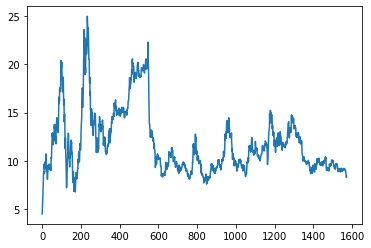

In [18]:
plt.plot(data.close.values)